# 3. Manipulación básica de datos
*"In God we trust. All others must bring data" (W. E. Deming).*  


## 3.1 Carga de los datos

En python trabajaremos con varias bibliotecas y como primer paso debemos indicar cuál emplearemos para importar los datos. En este caso utilizaremos *pandas* con el alias *pd*. El nombre de pandas proviene de *panel data*. Otra alternativa, especialmente para grandes conjuntos de datos, es *polars*.

In [1]:
import pandas as pd

Ahora vamos a utilizar la función `pd.read_excel()` para leer el archivo en la cual agregaremos como argumentos la ubicación del archivo. 

In [2]:
url = 'https://github.com/adan-rs/AnalisisDatos/raw/main/s01_manipulacion_datos/data/casas.xlsx'

df = pd.read_excel(url)

Siempre se debe indicar la ubicación del archivo, a menos que el archivo esté en el mismo directorio del Jupyter notebook. Se pueden incluir algunas instrucciones mediante otros argumentos, por ejemplo, si es un archivo de Excel indicar qué hoja o columnas utilizar.

Los formatos más comunes son *csv* (comma separated value) y excel por lo que lo más frecuente es usar *read_excel* y *read_csv*. Dependiendo del tipo de archivo, también están disponibles funciones como *read_json*, *read_sas*, *read_stata*, *read_sql* y al menos una docena más.

### Dataframes

Una forma muy común de organizar los datos es en filas y columnas. Cada fila corresponde a una observación (elemento, objeto, caso, individuo, evento), y cada columna corresponde a una variable (en *machine learning* a las variables se les conoce como *features*). En Pandas, a este tipo de ordenamiento se le conoce como DataFrame y la función que utilizamos importa los datos en un dataframe.

In [3]:
df

,operacion,tipo,municipio,colonia,preciomillones,recamaras,baños,construccion
0,Venta,1,San Pedro Garza García,Colonia Del Valle,4.20,3,2.0,130
1,Venta,0,San Pedro Garza García,Colonia Del Valle,5.10,3,5.0,280
2,Venta,1,San Pedro Garza García,Colonia Del Valle,5.50,2,2.0,112
3,Venta,1,San Pedro Garza García,Colonia Del Valle,5.70,2,2.0,112
4,Venta,1,San Pedro Garza García,Colonia Del Valle,5.80,2,2.0,112
...,...,...,...,...,...,...,...,...
149,Venta,0,San Pedro Garza García,Colonia Del Valle,47.00,3,5.0,950
150,Venta,0,San Pedro Garza García,Colonia Del Valle,47.00,3,4.0,950
151,Venta,0,San Pedro Garza García,Colonia Del Valle,49.00,4,5.0,960
152,Venta,0,San Pedro Garza García,Colonia Del Valle,49.00,4,4.0,960


Observa que una característica adicional es que cuentan con un índice para las filas. En principio, este índice es secuencial empezando por cero, pero puede ser sustituido por un ID, una fecha o cualquier otra variable. Un dataframe puede incluso tener varios índices para representar objetos multidimensionales (cubos de datos).

Para seleccionar solamente una columna utiliza corchetes o notación con punto, por ejemplo `df['recamaras']` o `df.recamaras`. Al seleccionar una sola columna esta se mostrará como una serie.

In [4]:
df['recamaras']

0      3
1      3
2      2
3      2
4      2
      ..
149    3
150    3
151    4
152    4
153    4
Name: recamaras, Length: 154, dtype: int64

Para seleccionar múltiples columnas, agrega las columnas en una lista:

In [5]:
df[['recamaras', 'baños']]

,recamaras,baños
0,3,2.0
1,3,5.0
2,2,2.0
3,2,2.0
4,2,2.0
...,...,...
149,3,5.0
150,3,4.0
151,4,5.0
152,4,4.0


Es posible hacer operaciones básicas con columnas. Por ejemplo

In [6]:
df['preciom2'] = (df['preciomillones'] / df['construccion']) * 1000000
df

,operacion,tipo,municipio,colonia,preciomillones,recamaras,baños,construccion,preciom2
0,Venta,1,San Pedro Garza García,Colonia Del Valle,4.20,3,2.0,130,32307.692308
1,Venta,0,San Pedro Garza García,Colonia Del Valle,5.10,3,5.0,280,18214.285714
2,Venta,1,San Pedro Garza García,Colonia Del Valle,5.50,2,2.0,112,49107.142857
3,Venta,1,San Pedro Garza García,Colonia Del Valle,5.70,2,2.0,112,50892.857143
4,Venta,1,San Pedro Garza García,Colonia Del Valle,5.80,2,2.0,112,51785.714286
...,...,...,...,...,...,...,...,...,...
149,Venta,0,San Pedro Garza García,Colonia Del Valle,47.00,3,5.0,950,49473.684211
150,Venta,0,San Pedro Garza García,Colonia Del Valle,47.00,3,4.0,950,49473.684211
151,Venta,0,San Pedro Garza García,Colonia Del Valle,49.00,4,5.0,960,51041.666667
152,Venta,0,San Pedro Garza García,Colonia Del Valle,49.00,4,4.0,960,51041.666667


Observe que el resultado se guardó en una nueva columna con el nombre de *preciom2*

## 3.2 Revisión de los datos

### Revisa los primeros renglones

Siempre es útil revisar los primeros renglones del dataframe para verificar que los datos estén en el formato apropiado. Para ello, vamos a utilizar el método `head()`. 

Un *método* es una función asociada a un objeto y se utiliza un punto para indicar esta asociación, por ejemplo `df.head()`. Un método tiene parámetros que van entre paréntesis. En el caso de `head()` podemos agregar el número de renglones que deseamos visualizar. De manera predeterminada este número es de 5 renglones

In [7]:
df.head(5)

,operacion,tipo,municipio,colonia,preciomillones,recamaras,baños,construccion,preciom2
0,Venta,1,San Pedro Garza García,Colonia Del Valle,4.2,3,2.0,130,32307.692308
1,Venta,0,San Pedro Garza García,Colonia Del Valle,5.1,3,5.0,280,18214.285714
2,Venta,1,San Pedro Garza García,Colonia Del Valle,5.5,2,2.0,112,49107.142857
3,Venta,1,San Pedro Garza García,Colonia Del Valle,5.7,2,2.0,112,50892.857143
4,Venta,1,San Pedro Garza García,Colonia Del Valle,5.8,2,2.0,112,51785.714286


Una alternativa es revisar los últimos cinco valores con `tail()` o una muestra con `sample()`. 

In [8]:
# Práctica: encuentra los últimos 3 valores del DataFrame


### Revisa la forma de tu dataframe

Cada dataframe tiene un *atributo* (una característica automática) de forma (*shape*). Esta forma tiene dos dimensiones: número de renglones y número de columnas. Estos dos valores se acomodan en una *tupla* (una lista que no puede ser modificada). Para desplegar este atributo agregamos `.shape` al nombre del DataFrame: 

In [9]:
df.shape

(154, 9)

Nótese que *shape* no requiere argumentos y por tanto no se añaden paréntesis. Esa es la diferencia entre un *atributo* y un *método*.

### Revisa los nombres de las columnas
Los nombres de las columnas corresponden a los nombres de las variables y son otro atributo de los dataframes. Puedes consultar estos nombres agregando `.columns` al nombre del DataFrame:

In [10]:
df.columns

Index(['operacion', 'tipo', 'municipio', 'colonia', 'preciomillones',
       'recamaras', 'baños', 'construccion', 'preciom2'],
      dtype='object')

En caso de desear renombrar una columna en un dataframe llamado *df* se puede utilizar:   
`df.rename(columns={'nombre_anterior': 'nombre_nuevo'})`  
que sobreescribe el DataFrame con el nuevo nombre.

In [11]:
df = df.rename(columns={'baños':'banos'})
df.columns

Index(['operacion', 'tipo', 'municipio', 'colonia', 'preciomillones',
       'recamaras', 'banos', 'construccion', 'preciom2'],
      dtype='object')

Si deseas borrar una columna puedes utilizar `df.drop(columns=['nombre_columna'])`.

In [12]:
df = df.drop(columns=['colonia'])
df

,operacion,tipo,municipio,preciomillones,recamaras,banos,construccion,preciom2
0,Venta,1,San Pedro Garza García,4.20,3,2.0,130,32307.692308
1,Venta,0,San Pedro Garza García,5.10,3,5.0,280,18214.285714
2,Venta,1,San Pedro Garza García,5.50,2,2.0,112,49107.142857
3,Venta,1,San Pedro Garza García,5.70,2,2.0,112,50892.857143
4,Venta,1,San Pedro Garza García,5.80,2,2.0,112,51785.714286
...,...,...,...,...,...,...,...,...
149,Venta,0,San Pedro Garza García,47.00,3,5.0,950,49473.684211
150,Venta,0,San Pedro Garza García,47.00,3,4.0,950,49473.684211
151,Venta,0,San Pedro Garza García,49.00,4,5.0,960,51041.666667
152,Venta,0,San Pedro Garza García,49.00,4,4.0,960,51041.666667


### Revisa los datos perdidos
Es importante identificar los datos perdidos en un dataframe. Aunque en algunos casos son omitidos automáticamente, muchos procedimientos requieren que se tenga una matriz completa sin datos perdidos. 

Pandas utiliza el símbolo *NaN* (Not a number) para indicar datos numéricos perdidos (específicamente, datos perdidos de punto flotante). Si son datos de series de tiempo (*datatime*) son indicados como *NaT*.

Una forma rápida de consultar los datos perdidos en un dataframe es mediante el método `info()`. Al utilizarlo se mostrará el nombre de cada columna y el total de registros (*non-null values*)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   operacion       154 non-null    object 
 1   tipo            154 non-null    int64  
 2   municipio       154 non-null    object 
 3   preciomillones  154 non-null    float64
 4   recamaras       154 non-null    int64  
 5   banos           154 non-null    float64
 6   construccion    154 non-null    int64  
 7   preciom2        154 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 9.8+ KB


Para revisar los valores perdidos en una variable puedes usar los métodos `isna()` o `notna()`, que arrojarán *True* o *False* para elemento según corresponda. Puedes contar el número de valores perdidos encadenando `sum()` y especificar incluso la variable:

In [14]:
df.recamaras.isna().sum()

0

Pandas reconoce automáticamente algunos formatos de valores perdidos como *NA* o *NULL* pero considera que en muchas bases de datos los valores perdidos tienen algún código numérico como 99 o incluso 0.

Para borrar los datos perdidos puedes utilizar `df.dropna()` para borrar las filas con valores perdidos. Se puede sobrescribir el DataFrame con los cambios utilizando `df = df.dropna()` o bien con: `df.dropna(inplace=True)`

In [15]:
df = df.dropna()

### Revisa los tipos de datos

Para identicar qué tipo de dato es cada variable se puede utilizar el atributo `dtypes`.

In [16]:
df.dtypes

operacion          object
tipo                int64
municipio          object
preciomillones    float64
recamaras           int64
banos             float64
construccion        int64
preciom2          float64
dtype: object

Puedes cambiar un tipo de dato a otro mediante el método `astype()`. Por ejemplo, si X debe ser *float* se puede usar `df.X.astype(float)`

In [17]:
df['tipo'] = df['tipo'].astype(object)
df.dtypes

operacion          object
tipo               object
municipio          object
preciomillones    float64
recamaras           int64
banos             float64
construccion        int64
preciom2          float64
dtype: object

### Cálculo de estadística descriptiva
Aunque este tema se revisará a detalle más adelante, se puede utilizar `df.describe()` para obtener de manera general la estadística descriptiva.

In [18]:
df.describe()

,preciomillones,recamaras,banos,construccion,preciom2
count,154.000000,154.000000,154.000000,154.000000,154.000000
mean,19.226234,3.175325,3.727273,450.311688,41673.282911
std,10.509965,0.667970,1.199252,194.372176,8675.386644
min,4.200000,2.000000,2.000000,112.000000,18214.285714
25%,10.520000,3.000000,3.000000,275.000000,36981.581109
50%,18.035000,3.000000,4.000000,474.000000,41020.440252
75%,26.500000,4.000000,5.000000,584.750000,47116.968699
max,49.980000,6.000000,8.000000,1100.000000,72580.645161


## 3.3 Consulta y filtrado de dataframes
Pandas tiene un método `query()`en el cual se introduce una expresión booleana y arroja un subconjunto del dataframe en el cual la expresión booleana es verdadera.

In [19]:
df.query('construccion < 150')

,operacion,tipo,municipio,preciomillones,recamaras,banos,construccion,preciom2
0,Venta,1,San Pedro Garza García,4.20,3,2.0,130,32307.692308
2,Venta,1,San Pedro Garza García,5.50,2,2.0,112,49107.142857
3,Venta,1,San Pedro Garza García,5.70,2,2.0,112,50892.857143
4,Venta,1,San Pedro Garza García,5.80,2,2.0,112,51785.714286
6,Venta,0,San Pedro Garza García,6.11,2,2.0,135,45259.259259
7,Venta,1,San Pedro Garza García,6.20,2,2.0,129,48062.015504


Las consultas se pueden ser más complejas, por ejemplo

In [20]:
df.query('construccion < 150 and recamaras == 2')

,operacion,tipo,municipio,preciomillones,recamaras,banos,construccion,preciom2
2,Venta,1,San Pedro Garza García,5.50,2,2.0,112,49107.142857
3,Venta,1,San Pedro Garza García,5.70,2,2.0,112,50892.857143
4,Venta,1,San Pedro Garza García,5.80,2,2.0,112,51785.714286
6,Venta,0,San Pedro Garza García,6.11,2,2.0,135,45259.259259
7,Venta,1,San Pedro Garza García,6.20,2,2.0,129,48062.015504


En el ejemplo anterior, observe que se utilizó el doble signo de igualdad `==`. Se utiliza así cuando el objetivo es la comparación de valores

Otra opción para filtrar con condiciones es escribir la condición dentro de los corchetes

In [21]:
df[df['construccion'] < 150]

,operacion,tipo,municipio,preciomillones,recamaras,banos,construccion,preciom2
0,Venta,1,San Pedro Garza García,4.20,3,2.0,130,32307.692308
2,Venta,1,San Pedro Garza García,5.50,2,2.0,112,49107.142857
3,Venta,1,San Pedro Garza García,5.70,2,2.0,112,50892.857143
4,Venta,1,San Pedro Garza García,5.80,2,2.0,112,51785.714286
6,Venta,0,San Pedro Garza García,6.11,2,2.0,135,45259.259259
7,Venta,1,San Pedro Garza García,6.20,2,2.0,129,48062.015504


En el ejemplo anterior `df['construccion']` sirve para identificar una columna, luego `df['construccion'] < 150` hace una comparación cuyo resultado es una serie booleana y finalmente, al usar `df[...]` Pandas selecciona solamente las filas para las cuales el resultado es `True`

Si son dos condiciones, cada condición va dentro de un paréntesis

In [22]:
df[(df.construccion < 150) & (df.recamaras == 2)]

,operacion,tipo,municipio,preciomillones,recamaras,banos,construccion,preciom2
2,Venta,1,San Pedro Garza García,5.50,2,2.0,112,49107.142857
3,Venta,1,San Pedro Garza García,5.70,2,2.0,112,50892.857143
4,Venta,1,San Pedro Garza García,5.80,2,2.0,112,51785.714286
6,Venta,0,San Pedro Garza García,6.11,2,2.0,135,45259.259259
7,Venta,1,San Pedro Garza García,6.20,2,2.0,129,48062.015504


Una selección avanzada de filas y columnas también se puede realizar con `.loc` con el formato `df.loc[filtro, columnas]`. Si se omiten las columnas se seleccionarán todas.

In [23]:
df.loc[df['construccion'] < 150, ['construccion', 'recamaras']]

,construccion,recamaras
0,130,3
2,112,2
3,112,2
4,112,2
6,135,2
7,129,2


*Nota*: Al filtrar con condiciones y luego hacer modificaciones al DataFrame es posible que te arroje la siguiente advertencia:  
`SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame`.  
En esos casos surgen cuando Pandas no puede determinar si deseas modificar una copia del DataFrame o el DataFrame original. La alternativa para evitar este error es filtrar utilizando `.loc`.  
Por ejemplo, supongamos que realizas lo siguiente:  
```
filtro = df['recamaras'] > 5  
df[filtro]['construccion'] = 800    
```
Esto arrojará la advertencia `SettingWithCopyWarning`.
La alternativa para evitarlo es:  
```
filtro = df['recamaras'] > 5  
df.loc[filtro, 'construccion'] = 800  
```
La diferencia está en que ahora se está accediendo directamente al DataFrame original y no una copia del original

## 3.4 Transformaciones básicas

### Ordenar dataframe
Podemos ordenar un dataframe con base en varias de las variables

In [24]:
df.sort_values(by=['recamaras', 'banos'], inplace=True)
#df.reset_index(inplace=True)
df

,operacion,tipo,municipio,preciomillones,recamaras,banos,construccion,preciom2
2,Venta,1,San Pedro Garza García,5.50,2,2.0,112,49107.142857
3,Venta,1,San Pedro Garza García,5.70,2,2.0,112,50892.857143
4,Venta,1,San Pedro Garza García,5.80,2,2.0,112,51785.714286
5,Venta,1,San Pedro Garza García,6.00,2,2.0,211,28436.018957
6,Venta,0,San Pedro Garza García,6.11,2,2.0,135,45259.259259
...,...,...,...,...,...,...,...,...
144,Venta,0,San Pedro Garza García,39.50,4,7.0,762,51837.270341
137,Venta,0,San Pedro Garza García,31.60,4,8.0,643,49144.634526
28,Venta,0,San Pedro Garza García,9.60,5,5.0,340,28235.294118
87,Venta,0,San Pedro Garza García,18.99,5,5.0,480,39562.500000


### Agrupado

Puedes agrupar las filas con base en una variable y, por ejemplo, calcular la media para otras variables

In [25]:
df.groupby('tipo')['preciomillones'].mean()

tipo
0    24.820230
1    11.962388
Name: preciomillones, dtype: float64

Podemos agrupar con base en dos variables y mostrar los valores promedio de las otras variables

In [26]:
df.groupby(['tipo', 'recamaras'])['preciomillones'].mean()

tipo  recamaras
0     2             6.110000
      3            22.557083
      4            28.626286
      5            14.295000
      6            40.000000
1     2             9.269412
      3            12.717872
      4            15.386667
Name: preciomillones, dtype: float64

### Tablas pivote
Para crear tablas pivote se puede utilizar el método `pivot_table` por ejemplo:  
`df.pivot_table(index='columna1', values='columna2', aggfunc='mean')`

En el parámetro *index* está la variable que irá en filas y en el parámetro *columns* la variable que irá en las columnas. En *values* se indican los valores que irán en las intersecciones y en *aggfunc* se indica el cálculo a realizar (mean, sum, count, median, min, max, std, var). Por ejemplo:

In [27]:
df_pivote = df.pivot_table(index='tipo', columns='recamaras', 
                           values='preciomillones', aggfunc="count")
df_pivote

recamaras,2,3,4,5,6
tipo,,,,,
0,1.0,48.0,35.0,2.0,1.0
1,17.0,47.0,3.0,NaN,NaN


## 3.5 Gráficos básicos

Aunque en este DataFrame no tenemos series de tiempo, un gráfico de línea para series temporales para una columna 'A' se podría hacer con `df['A'].plot()`

Un histograma básico con `df['A'].plot.hist()` o incluso `df['A'].hist()`

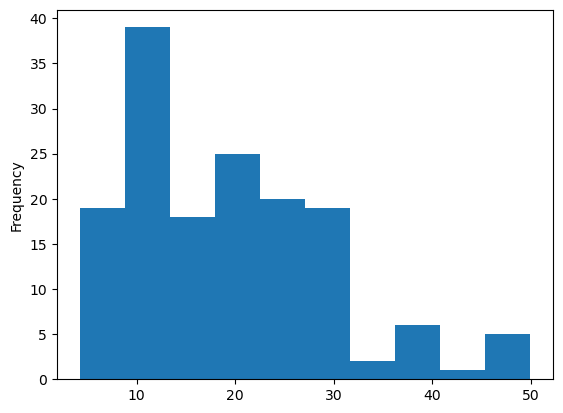

In [29]:
# Ejemplo de histograma
df['preciomillones'].plot.hist();

Para un diagrama de cajas se puede utilizar `df['A'].plot.box()`

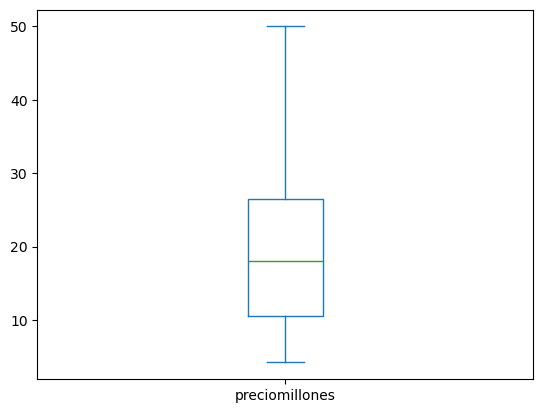

In [30]:
# Ejemplo de diagrama de caja
df['preciomillones'].plot.box();

Finalmente, un diagrama de dispersión se puede realizar con `df.plot.scatter(x='A', y='B')`

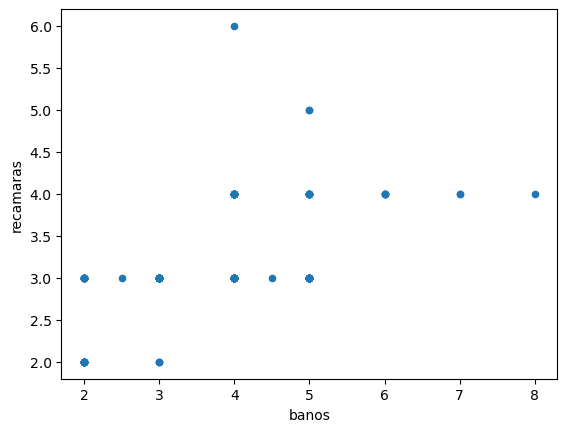

In [31]:
# Ejemplo de diagrama de dispersión
df.plot.scatter(x='banos', y='recamaras');

## 3.6 Uniones de dataframes
La ejemplificación de uniones entre dataframes se realizará con dos dataframes sencillos para mostrar mejor el resultado

In [32]:
# Dataframe izquierdo
df_L = {'key':['A','B','C'],
        'L1':[ 1, 2, 3]}
df_L = pd.DataFrame(df_L)
df_L

,key,L1
0,A,1
1,B,2
2,C,3


In [33]:
# Dataframe derecho
df_R = {'key':['A','B','D'],
        'R1':[ 'T', 'F', 'T']}
df_R = pd.DataFrame(df_R)
df_R

,key,R1
0,A,T
1,B,F
2,D,T


Unión interna de los dataframes L y R. 
Solo conserva filas que están en AMBOS dataframes

In [34]:
df_i = pd.merge(df_L, df_R, how='inner', on='key')
df_i

,key,L1,R1
0,A,1,T
1,B,2,F


Unión externa de los dataframes L y R: Devuelve todos los valores en todas filas, rellenando con NaN los valores faltantes en ambos.

In [35]:
df_o = pd.merge(df_L, df_R, how='outer', on='key')
df_o

,key,L1,R1
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


Unión izquierda de los dataframes L y R: devuelve todas las filas del dataframe izquierdo y las une con los valores coincidentes del dataframe derecho.

In [36]:
df_left = pd.merge(df_L, df_R, how='left', on='key')
df_left

,key,L1,R1
0,A,1,T
1,B,2,F
2,C,3,NaN


## Glosario
- *Atributo*: Propiedad o característica de un objeto. Utiliza la sintaxis `objeto.atributo`
- *DataFrame*: Estructura de datos semejante a una tabla con filas y columnas.
- *Método*: Función asociada a un objeto. Utiliza la sintaxis `objeto.metodo()`
